<a href="https://colab.research.google.com/github/jmj732/Bigdata-Analysis/blob/master/%5B%EB%AC%B8%EC%A0%9C%ED%95%B4%EA%B2%B003%5D%ED%8C%90%EB%8B%A4%EC%8A%A4%EA%B8%B0%EC%B4%882_2213%EC%A1%B0%EC%9E%AC%EB%AF%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**자료형 변환**

In [ ]:
import pandas as pd
# 데이터 준비
data = {
    "메뉴":['아메리카노', '카페라떼', '카페모카', '카푸치노', '에스프레소', '밀크티', '녹차'],
    "가격":[4500.0, 5000.0, 5500.0, 5000.0, 4000.0, 5900.0, 5300.0],
    "칼로리":['10', '110', '250', '110', '20', '210', '0'],
}
df = pd.DataFrame(data)
df.to_csv('cafe.csv', index=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   메뉴      7 non-null      object 
 1   가격      7 non-null      float64
 2   칼로리     7 non-null      object 
dtypes: float64(1), object(2)
memory usage: 300.0+ bytes


In [ ]:
# 가격을 int로
df = df.astype({'가격': int})
# 칼로리를 float 로
df = df.astype({'칼로리': int})

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   메뉴      7 non-null      object
 1   가격      7 non-null      int64 
 2   칼로리     7 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 300.0+ bytes
None


**새로운 컬럼 추가**

In [ ]:
# 할인가 컬럼 추가
discount = 0.2

df['할인가'] = df['가격'] * (1-discount)
print(df)

      메뉴      가격  칼로리     할인가
0  아메리카노  4500.0   10  3600.0
1   카페라떼  5000.0  110  4000.0
2   카페모카  5500.0  250  4400.0
3   카푸치노  5000.0  110  4000.0
4  에스프레소  4000.0   20  3200.0
5    밀크티  5900.0  210  4720.0
6     녹차  5300.0    0  4240.0


**데이터 삭제(컬럼, 행)**

In [ ]:
# 1행 삭제 행 = axis 0
#df.drop(1, axis = 0)

# 칼로리 삭제
# df.drop('칼로리', axis = 1
df

,메뉴,가격,할인가
0,아메리카노,4500.0,3600.0
2,카페모카,5500.0,4400.0
3,카푸치노,5000.0,4000.0
4,에스프레소,4000.0,3200.0
5,밀크티,5900.0,4720.0
6,녹차,5300.0,4240.0


**데이터 추가 변경**

In [ ]:
# 결측값으로 추가, 원산지 컬럼을 만들고 결측값(NaN)으로 대입
import numpy as np
df['원산지'] = np.nan
df
# 아메리카노의 원산지는 '콜롬비아' 데이터 추가
df.loc[df['메뉴'] == '아메리카노','원산지'] = '콜롬비아'
df.loc[1:, '원산지'] = "과테말라"
df

# 리스트 형태로 데이터(행) 추가 : 인덱스는 '시즌', 데이터는 ['크리스마스라떼', 6000, 300, '한국']
df.loc['시즌'] = ['크리스마스라떼', 6000, 300, 4800, '한국',]
df

# 딕셔너리 형태로 데이터(행) 추가 : loc 사용, 인덱스는 7로 데이터는 '메뉴':'딴짓커피', '가격':2000, '칼로리':20
df.loc[7] = {'메뉴':'딴짓커피', '가격':2000, '칼로리':20, '할인가' : 1800, '원산지' : '케냐'}
df

<ipython-input-43-9cdf2684d558>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '콜롬비아' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['메뉴'] == '아메리카노','원산지'] = '콜롬비아'


,메뉴,가격,칼로리,할인가,원산지
0,아메리카노,4500.0,10,3600.0,콜롬비아
1,카페라떼,5000.0,110,4000.0,과테말라
2,카페모카,5500.0,250,4400.0,과테말라
3,카푸치노,5000.0,110,4000.0,과테말라
4,에스프레소,4000.0,20,3200.0,과테말라
5,밀크티,5900.0,210,4720.0,과테말라
6,녹차,5300.0,0,4240.0,과테말라
시즌,크리스마스라떼,6000.0,300,4800.0,한국
7,딴짓커피,2000.0,20,1800.0,케냐


**정렬**

In [ ]:
# 인덱스 기준 (기본값 ascending=True) 정렬

df.sort_index(ascending=False)

# 메뉴 기준 정렬
df.sort_values("메뉴")

# 가격과 메뉴 기준 정렬
df.sort_values(by=["가격","메뉴"], ascending=False)

# 인덱스 새로 만들기 drop=True
df.reset_index(drop = True)
df

,메뉴,가격,칼로리
0,아메리카노,4500.0,10
1,카페라떼,5000.0,110
2,카페모카,5500.0,250
3,카푸치노,5000.0,110
4,에스프레소,4000.0,20
5,밀크티,5900.0,210
6,녹차,5300.0,0


**필터링**

In [ ]:
# 칼로리가 50 미만 데이터
cond = df['칼로리'] < 50 # True False 시리즈로 생성
df[cond]

# 칼로리가 50 이상 데이터 ( 조건문에  ~  붙이는 방법 )
df[~cond]

# 가격이 5000 이상이고 칼로리가 100 초과인 데이터
cond = (df['가격'] >= 5000) & (df['칼로리'] > 100)
df[cond]
# 메뉴에 '녹차' 가 있는 경우
cond = df['메뉴'] == '녹차'
df[cond]

# 메뉴에 '녹차' '카푸치노' '카페라떼' 가 있는 경우
cond = df['메뉴'].isin(['녹차', '카푸치노', '카페라떼'])
df[cond]


,메뉴,가격,칼로리
1,카페라떼,5000,110
3,카푸치노,5000,110
6,녹차,5300,0


**프로젝트 - 조건에 맞는 데이터 추출 & 데이터 프레임에 함수 적용( apply )**

In [ ]:
import pandas as pd

df = pd.DataFrame({'a' : [i for i in range(1, 11)], 'b' : [i for i in range(11, 21)], 'c' : [i for i in range(21, 31)]})
df
# a, c 열 출력
df[['a','c']]

# a 가 3 이상인 데이터 출력
cond = df['a'] >= 3
df[cond]

# a, c 열만 출력
df[['a','c']]

# c 가 최댓값인 데이터 출력
cond = df['c'] == df['c'].max()
df[cond]
# a 가 3 이상인 데이터 중 a, c 열만 출력
cond = df['a'] >= 3
df[cond][['a','c']]

# a 가 3 이상이고, b 가 16 미만인 데이터 출력
cond = (df['a'] >= 3) & (df['b'] < 16)
df[cond]

# a, b, c를 합한 total 컬럼을 추가하라.
df['total'] = df['a'] + df['b'] + df['c']
df

# total 이 50 이상이면 'A',  50미만 40이상이면 'B', 40미만이면 'C' 등급을 지정하는 'grade' 컬럼을 추가하라. ( 중첩 조건문 np.where 이용 )
df['grade'] = np.where(df['total'] >= 50, 'A', np.where(df['total'] >= 40, 'B', 'C'))
df

#  위 문제를 사용자 정의 함수를 만들어 apply 를 적용하는 코드로 변경하라.

def f(x):
    if x >= 50:
        return 'A'
    elif x >= 40:
        return 'B'
    else:
        return 'C'

df['grade'] = df['total'].apply(f)
df

# grade를 오름차순으로 정렬하라. ( sort_values )
df.sort_values('grade', ascending=False)



,a,b,c,total,grade
0,1,11,21,33,C
1,2,12,22,36,C
2,3,13,23,39,C
3,4,14,24,42,B
4,5,15,25,45,B
5,6,16,26,48,B
6,7,17,27,51,A
7,8,18,28,54,A
8,9,19,29,57,A
9,10,20,30,60,A


In [115]:
from google.colab import files
uploaded = files.upload()

Saving data2.csv to data2.csv


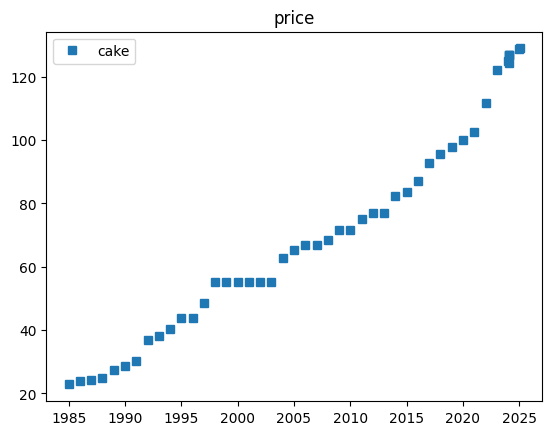

In [118]:
import pandas as pd
data = pd.read_csv("./data1.csv")
data1 = pd.read_csv("./data2.csv")

import matplotlib.pyplot as plt
plt.title('price')
plt.plot( data['시점'], data['케이크'], 's', label= 'cake')
plt.legend()
plt.show()


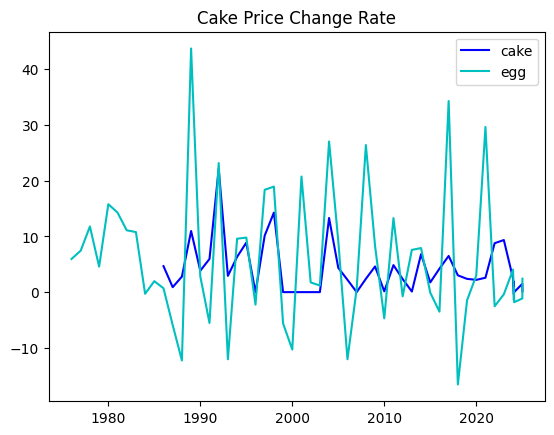

In [121]:
cake = data['케이크']
cakep = cake.shift(1)
egg = data1['달걀']
eggp = data1['달걀'].shift(1)

# 그래프 그리기
plt.title('Cake Price Change Rate')
plt.plot(data['시점'][1:], (cake[1:] - cakep[1:]) / cakep[1:] * 100, 'b', label='cake')
plt.plot(data1['시점'][1:], (egg[1:] - eggp[1:]) / eggp[1:] * 100, 'c', label='egg')
plt.legend()
plt.show()

**프로젝트 - 달걀의 가격 변화 알아보기**

In [ ]:



# 데이터 시각화

import matplotlib.pyplot as plt
plt.title('price')
plt.plot( data['시점'], data['달걀'], 'b.', label='egg')
plt.legend()
plt.show()


import matplotlib.pyplot as plt
plt.title('egg price')
import seaborn as sns
sns.scatterplot(x='시점', y='달걀', data = data )
plt.legend(labels=['egg'], title='price')

**프로젝트 - 소비자 물가 지수**
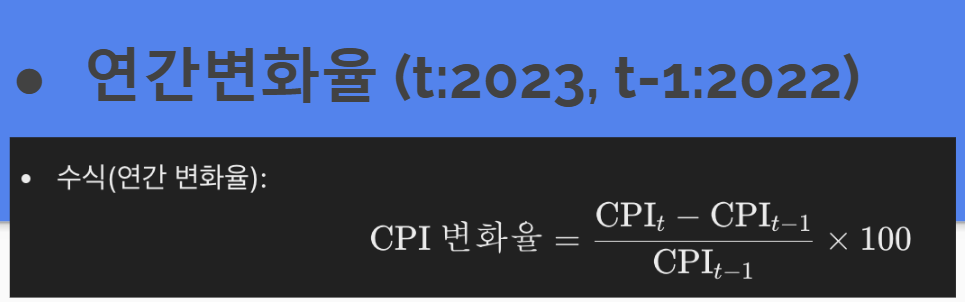

In [ ]:
# 품목별 소비자 물가 지수를 구해서 다른 품목과 비교하는 그래프 그리기( line graph )